In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [4]:
data=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\News1.csv")
data.head(20)

,Unnamed: 0,title,text,subject,date,class
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [5]:
data.shape

(44919, 6)

In [6]:
#Preprocessing
data.drop(["title","subject","date","Unnamed: 0"],axis=1,inplace=True)

In [7]:
data.head(20)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [8]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [9]:
data=data.sample(frac=1) 
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

In [10]:
data.head()

,text,class
0,WARSAW (Reuters) - The European Commission s d...,1
1,Donald Trump kicked off another round of Repub...,0
2,Former President Barack Obama seems to be feel...,0
3,"ANKARA (Reuters) - Iran s supreme leader, Ayat...",1
4,WASHINGTON (Reuters) - The U.S. Supreme Court ...,1


<Axes: xlabel='class', ylabel='count'>

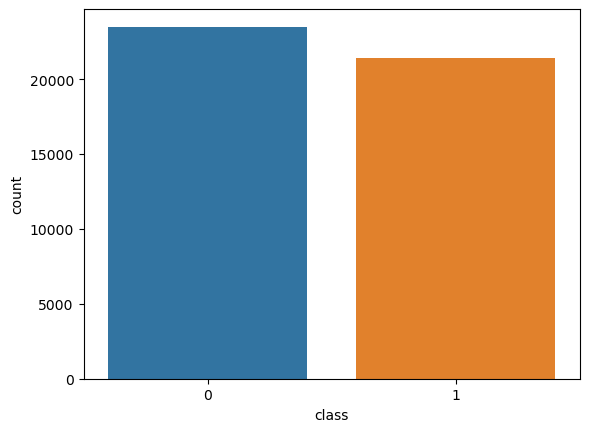

In [11]:
sns.countplot(data=data,
              x='class')

In [12]:
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer


In [13]:

def text_preprocessing(text_data):
    final_text= []
      
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        final_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))
  
    return final_text


In [14]:
preprocessed_review = text_preprocessing(data['text'].values)
data['text'] = preprocessed_review

100%|██████████████████████████████████████████████████████████████████████████| 44919/44919 [1:09:05<00:00, 10.83it/s]


In [15]:
data.head(20)

,text,class
0,warsaw reuters the european commission decisio...,1
1,donald trump kicked another round republican m...,0
2,former president barack obama seems feeling no...,0
3,ankara reuters iran supreme leader ayatollah a...,1
4,washington reuters the us supreme court monday...,1
5,manhattan seeing significant problems due trum...,0
6,a huge rally 10000 chicagoans get hear candida...,0
7,and guy behind hate dumping 10 million pushing...,0
8,macomb county mi executive mark hackel release...,0
9,so immigration crisis never hear evening news ...,0


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
  
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    #print(bag_of_words)
    sum_words = bag_of_words.sum(axis=0) #column here is 0
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(data['text'], 20)
print(common_words)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])
df1

[('said', 130004), ('trump', 116009), ('the', 101315), ('us', 63063), ('would', 54935), ('president', 51035), ('people', 41023), ('one', 35480), ('state', 31185), ('also', 31121), ('new', 30860), ('reuters', 28765), ('donald', 27545), ('states', 27037), ('house', 26941), ('government', 26497), ('clinton', 25811), ('it', 25767), ('obama', 24812), ('he', 24599)]


,Review,count
0,said,130004
1,trump,116009
2,the,101315
3,us,63063
4,would,54935
5,president,51035
6,people,41023
7,one,35480
8,state,31185
9,also,31121


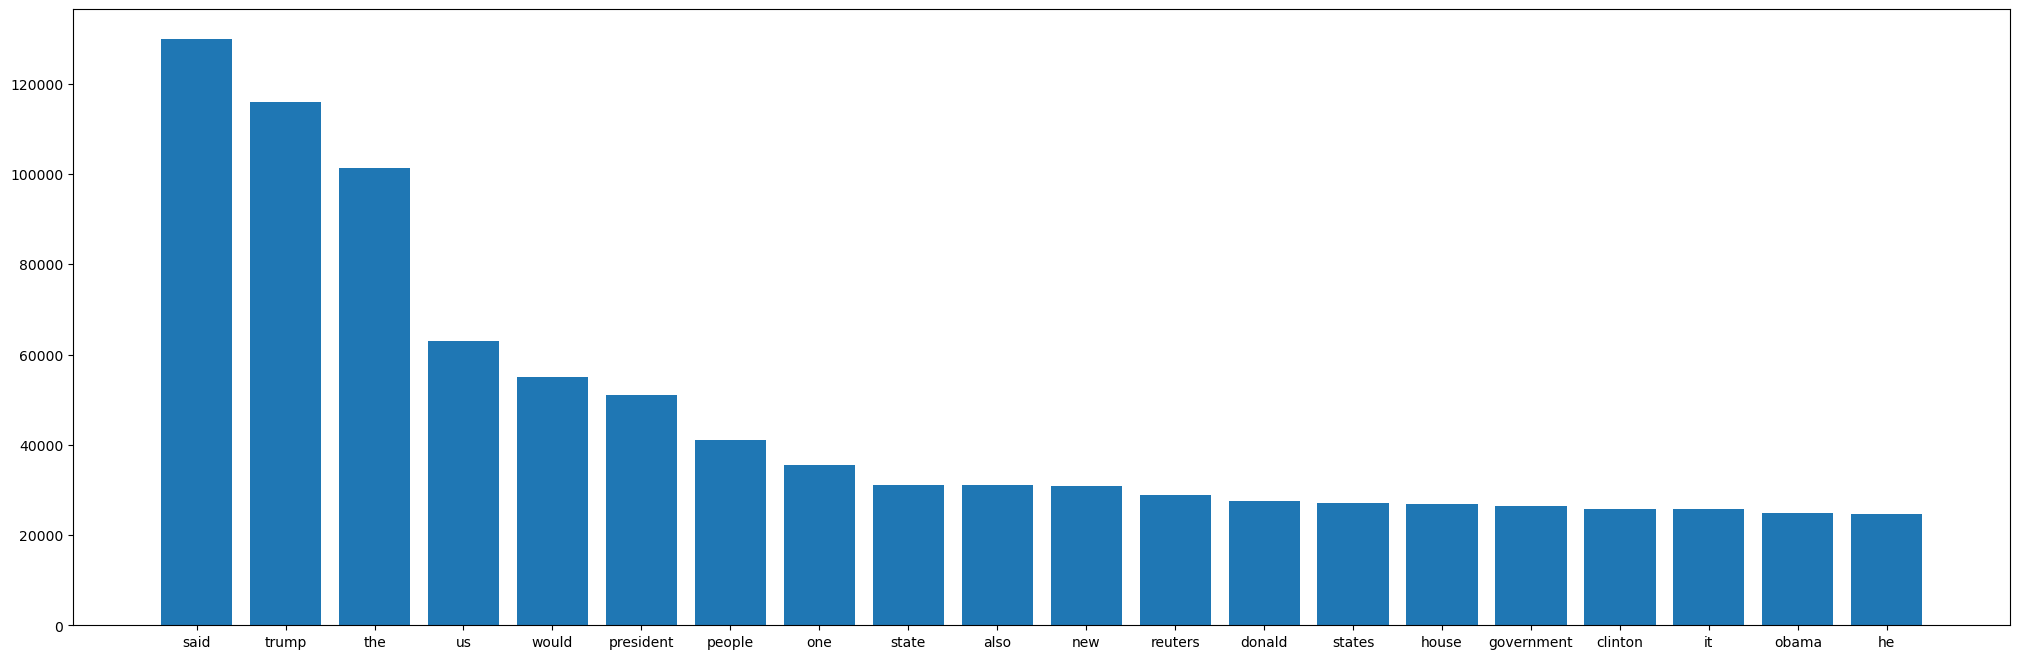

In [17]:
fig = plt.figure(figsize =(25, 8))
plt.bar(df1['Review'],df1['count'])
 
# Show Plot
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
  
x_train, x_test, y_train, y_test = train_test_split(data['text'], 
                                                    data['class'], 
                                                    test_size=0.25)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
  
vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [20]:
from sklearn.linear_model import LogisticRegression
  
model = LogisticRegression()
model.fit(x_train, y_train)
  
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9934399952506753
0.988780053428317


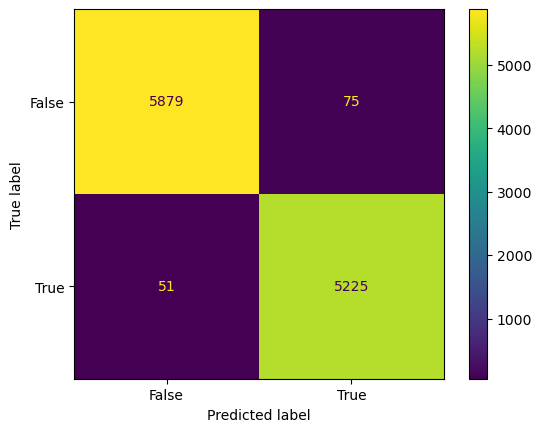

In [21]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
  
cm_display.plot()
plt.show()

In [22]:
from sklearn import svm
SVM = svm.SVC(C=1.0, kernel='linear')
SVM.fit(x_train,y_train)# predict the labels on validation dataset
predictions_SVM = SVM.predict(x_test)# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  99.59038290293856


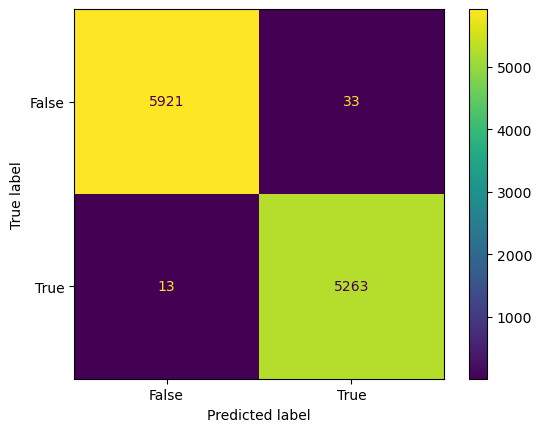

In [23]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions_SVM)
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
  
cm_display.plot()
plt.show()

In [24]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(x_train, y_train)
# testing the model
print(accuracy_score(y_train, NB.predict(x_train)))
print(accuracy_score(y_test, NB.predict(x_test)))

0.9567811451809196
0.9480854853072128


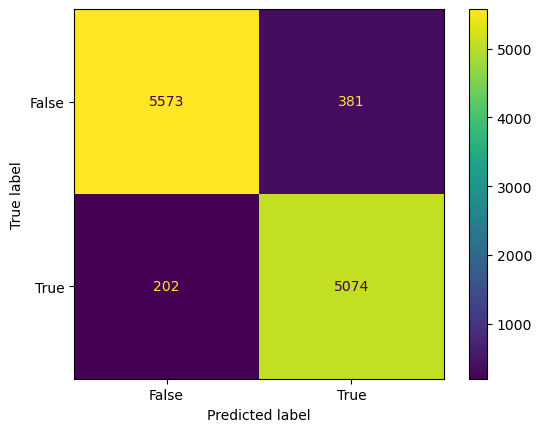

In [25]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, NB.predict(x_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
cm_display.plot()
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(x_train, y_train)
print(accuracy_score(y_train, RFC.predict(x_train)))
print(accuracy_score(y_test, RFC.predict(x_test)))

0.9999703167205913
0.9878895814781834


In [29]:
print(classification_report(y_test, RFC.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5954
           1       0.98      0.99      0.99      5276

    accuracy                           0.99     11230
   macro avg       0.99      0.99      0.99     11230
weighted avg       0.99      0.99      0.99     11230



In [45]:
# Sample text for classification
sample_text = "Imran khan PTI retains seat share."

# Preprocess the sample text
preprocessed_sample = text_preprocessing([sample_text])
preprocessed_sample = vectorization.transform(preprocessed_sample)

# Predict using Logistic Regression
logreg_prediction = model.predict(preprocessed_sample)

# Predict using SVM
svm_prediction = SVM.predict(preprocessed_sample)

# Predict using Naive Bayes
nb_prediction = NB.predict(preprocessed_sample)

# Predict using Random Forest Classifier
rfc_prediction = RFC.predict(preprocessed_sample)

# Define a function to map binary predictions to labels
def label_prediction(prediction):
    return "fake news" if prediction == 0 else "not fake news"

# Predict using Logistic Regression
logreg_label = label_prediction(logreg_prediction[0])

# Predict using SVM
svm_label = label_prediction(svm_prediction[0])

# Predict using Naive Bayes
nb_label = label_prediction(nb_prediction[0])

# Predict using Random Forest Classifier
rfc_label = label_prediction(rfc_prediction[0])

# Display the labeled predictions
print("Logistic Regression Prediction:", logreg_label)
print("SVM Prediction:", svm_label)
print("Naive Bayes Prediction:", nb_label)
print("Random Forest Classifier Prediction:", rfc_label)

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 501.65it/s]

Logistic Regression Prediction: fake news
SVM Prediction: fake news
Naive Bayes Prediction: not fake news
Random Forest Classifier Prediction: fake news
